# Importando bibliotecas

In [1]:
import numpy as np         # para fazer contas e mexer com matrizes
import pandas as pd        # para montar DataFrames (tabelas de bancos de dados)

import matplotlib.pyplot as plt
import seaborn as sns

import modelos as m

# CUIDADO!!! Para esconder os avisos do curvefit():
import warnings
warnings.filterwarnings("ignore")

In [2]:
# para não precisar reiniciar o kernel do jupyter-notebook quando mudar os arquivos .py
%load_ext autoreload
%autoreload 2

# Lendo dados

In [3]:
dadosdf = m.carrega_pickles()

Lendo porquinho_mra34.pickle			
Lendo porquinho_mra28.pickle			
Lendo porquinho_mra31.pickle			
Lendo porquinho_mra32.pickle			
Lendo porquinho_mra26.pickle			
Lendo porquinho_mra29.pickle			
Lendo porquinho_mra33.pickle			


## Incluindo volume esperado no dataframe

Volumes esperados:

* MRA26: 2622.9 mL; K = 0.0309
* MRA28: 2105.9 mL; K = 0.0447
* MRA29: 2205.7 mL; K = 0.0596
* MRA31: 1974.4 mL; K = 0.0619
* MRA32: 1440.2 mL; K = 0.0476
* MRA33: 2154.6 mL; K = 0.0634
* MRA34: ?

In [4]:
v_esperado = {
    "mra26": 2622.9,
    "mra28": 2105.9,
    "mra29": 2205.7,
    "mra31": 1974.4,
    "mra32": 1440.2,
    "mra33": 2154.6,
    "mra34": 2600 # chute
}

In [5]:
dadosdf["volume_esperado"] = dadosdf.apply(lambda row: v_esperado[row.Animal], axis=1)

In [6]:
dadosdf

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado
0,mra34,C,"[[9.928905963897705, -259.58831787109375], [20...",4,"[9.928905963897705, 14.968489646911621, 20.058...","[-259.58831787109375, -81.21270751953125, 147....",2600.0
1,mra34,D,"[[9.9609375, -167.6243133544922], [20.25208377...",5,"[9.9609375, 15.040364742279053, 20.13463592529...","[-167.6243133544922, 13.06080150604248, 203.19...",2600.0
2,mra34,B,"[[10.135156631469727, -149.72845458984375], [2...",3,"[10.135156631469727, 15.052343845367432, 20.00...","[-149.72845458984375, 36.645347595214844, 243....",2600.0
3,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",2105.9
4,mra28,B,"[[10.021874904632568, -128.87612915039062], [2...",3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208...",2105.9
5,mra28,D,"[[10.240625381469727, -179.3195037841797], [20...",5,"[10.240625381469727, 14.828125, 20.05937480926...","[-179.3195037841797, -62.187042236328125, 182....",2105.9
6,mra31,D,"[[10.0, -107.7169418334961], [20.2000007629394...",5,"[10.0, 15.0, 20.100000381469727, 24.8999996185...","[-107.7169418334961, 47.35507583618164, 235.19...",1974.4
7,mra31,B,"[[10.300000190734863, -25.01786231994629], [20...",3,"[10.300000190734863, 15.100000381469727, 19.89...","[-25.01786231994629, 122.25248718261719, 244.6...",1974.4
8,mra31,C,"[[9.699999809265137, -228.3211212158203], [20....",4,"[9.699999809265137, 15.300000190734863, 20.100...","[-228.3211212158203, -71.18547058105469, 125.5...",1974.4
9,mra32,D,"[[10.625260829925537, -53.54884338378906], [20...",5,"[10.625260829925537, 15.398958206176758, 20.37...","[-53.54884338378906, 33.332923889160156, 174.5...",1440.2


# Testando modelos

## Dados dos modelos

In [7]:
modelos = []

Vmin =  500 # mL
Vmax = 3500 # mL

# sigmoid_recruit_units:
#                 K, Vmax, mi, sigma, offset
mod = m.dados_modelos()
mod.model_function = m.sigmoid_recruit_units
mod.TLC_index = 1
mod.p0 =      [0.05, 2000, 25,     5,   -200]
mod.bounds = ([0.02, Vmin,  0,     2,   -500],
              [0.08, Vmax, 40,    40,    500])
modelos.append(mod)


# sigmoidvenegas1: (a, b, c, d):  V = a + b/(1 + np.exp(-(x-c)/d))
#              offset, Vmax, 'mi', 'sigma'   
mod = m.dados_modelos()
mod.model_function = m.sigmoidvenegas1
mod.TLC_index = 1
mod.p0 =      [  -200, 2000,   25,      5]
mod.bounds = ([  -500, Vmin,    0,      2],
              [   500, Vmax,   40,     40])
modelos.append(mod)


# sigmoidpaivaoffset2: (TLC,k1,k2,offset):  V = TLC/(1+(k1*TCL*np.exp(-k2*x)))
#            Vmax,      k1,   k2, offset
mod = m.dados_modelos()
mod.model_function = m.sigmoidpaivaoffset
mod.TLC_index = 0
mod.p0 =      [  2000,   0.01, 0.05,   -200]
mod.bounds = ([  Vmin,      0,    0,   -500],
              [  Vmax,      1,   40,    500])
modelos.append(mod)


# sigmoidvenegas2offset: TLC,B,k,c,d: V = (TLC-(B*np.exp(-k*x)))/(1 + np.exp(-(x-c)/d)) + offset
#                Vmax,        B,       k,       c,       d,  offset
mod = m.dados_modelos()
mod.model_function = m.sigmoidvenegas2offset
mod.TLC_index = 0
mod.p0 =      [  2000,     0.01,    0.05,      10,       1,    -300]
mod.bounds = ([  Vmin,  -np.inf, -np.inf,       0, -np.inf,   -5000 ],
              [  Vmax,   np.inf,  np.inf,      40,  np.inf,    5000 ])
modelos.append(mod)


# sigmoidmurphy: VM,Vm,k1,k2,k3: P = ( k1/(VM-x) ) + ( k2/(Vm-x) ) + k3
#                   VM,      Vm,      k1,      k2,      k3
mod = m.dados_modelos()
mod.model_function = m.sigmoidmurphy
mod.TLC_index = 0
mod.p0 =      [ 2000.0,  -200.0,  1000.0,  1000.0,    20.0]
mod.bounds = ([    500,    -500,     100,     100,    -100],
              [   3500,       0,  100000,  100000,     100])
mod.invert_PV = True
#modelos.append(mod)


## Extraindo informações

In [8]:
resultdf_indiv = m.testa_varios_indiv(dadosdf, modelos)

Rodando sigmoid_recruit_units
Rodando sigmoidvenegas1
Rodando sigmoidpaivaoffset
Rodando sigmoidvenegas2offset


In [9]:
resultdf_indiv

,Animal,Maneuver,n_steps,Pressures,Volumes,Model,Method,TLC_index,N_points_interp,p0,bounds,fitted,parameters,Vol_CT,error
0,mra34,C,4,"[9.928905963897705, 14.968489646911621, 20.058...","[-259.58831787109375, -81.21270751953125, 147....",sigmoid_recruit_units,lm,1,0,"[0.05, 2000, 25, 5, -200]",[],False,[],2600.0,0.000000
1,mra34,D,5,"[9.9609375, 15.040364742279053, 20.13463592529...","[-167.6243133544922, 13.06080150604248, 203.19...",sigmoid_recruit_units,lm,1,0,"[0.05, 2000, 25, 5, -200]",[],False,[],2600.0,0.000000
2,mra34,B,3,"[10.135156631469727, 15.052343845367432, 20.00...","[-149.72845458984375, 36.645347595214844, 243....",sigmoid_recruit_units,lm,1,0,"[0.05, 2000, 25, 5, -200]",[],False,[],2600.0,0.000000
3,mra28,C,4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",sigmoid_recruit_units,lm,1,0,"[0.05, 2000, 25, 5, -200]",[],False,[],2105.9,0.000000
4,mra28,B,3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208...",sigmoid_recruit_units,lm,1,0,"[0.05, 2000, 25, 5, -200]",[],False,[],2105.9,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,mra29,B,3,"[10.26111125946045, 15.117916584014893, 20.029...","[-307.4459228515625, -156.31631469726562, 16.6...",sigmoidvenegas2offset,dogbox,0,20,"[2000, 0.01, 0.05, 10, 1, -300]","([500, -inf, -inf, 0, -inf, -5000], [3500, inf...",True,"[3500.0, -0.020291207404501375, 42.12386705090...",2205.7,58.679784
1256,mra29,C,4,"[10.105555534362793, 15.18842601776123, 20.045...","[-265.270263671875, -145.95188903808594, 74.12...",sigmoidvenegas2offset,dogbox,0,20,"[2000, 0.01, 0.05, 10, 1, -300]","([500, -inf, -inf, 0, -inf, -5000], [3500, inf...",True,"[1322.7505794149467, 0.9657193149707118, 5.169...",2205.7,-40.030350
1257,mra33,D,5,"[10.312239646911621, 14.991406440734863, 20.00...","[-75.62246704101562, 107.81485748291016, 363.4...",sigmoidvenegas2offset,dogbox,0,20,"[2000, 0.01, 0.05, 10, 1, -300]","([500, -inf, -inf, 0, -inf, -5000], [3500, inf...",False,[],2154.6,0.000000
1258,mra33,B,3,"[10.303646087646484, 14.871094226837158, 20.07...","[146.587890625, 330.3841552734375, 560.5339355...",sigmoidvenegas2offset,dogbox,0,20,"[2000, 0.01, 0.05, 10, 1, -300]","([500, -inf, -inf, 0, -inf, -5000], [3500, inf...",True,"[3500.0, -0.8094562650590056, -0.2271837983886...",2154.6,62.443145


## Subsets

In [10]:
resultdf_indiv_fitted = resultdf_indiv[resultdf_indiv['fitted']==True]
resultdf_indiv_fitted_lm = resultdf_indiv_fitted[resultdf_indiv_fitted['Method']=='lm']
resultdf_indiv_fitted_trf = resultdf_indiv_fitted[resultdf_indiv_fitted['Method']=='trf']
resultdf_indiv_fitted_dogbox = resultdf_indiv_fitted[resultdf_indiv_fitted['Method']=='dogbox']

## Dados numéricos

In [11]:
# Verificando quantos casos fitaram, por modelo
resultdf_indiv[['Model','fitted','n_steps']].groupby('fitted').describe()

Model                                    n_steps                
       count unique                    top freq   count unique top freq
fitted                                                                 
False    347      4  sigmoidvenegas2offset  153     347      3   3  154
True     913      4     sigmoidpaivaoffset  271     913      3   5  348

In [12]:
# Verificando quantos casos fitaram, por modelo
resultdf_indiv[['Model','fitted']].groupby('fitted').count()

,Model
fitted,
False,347
True,913


In [13]:
# Verificando quantos casos fitaram, por modelo
resultdf_indiv[['Model','fitted']][resultdf_indiv['fitted']==True].groupby('Model').count()

,fitted
Model,
sigmoid_recruit_units,217
sigmoidpaivaoffset,271
sigmoidvenegas1,263
sigmoidvenegas2offset,162


## Gráficos

### Quantos dados fitaram

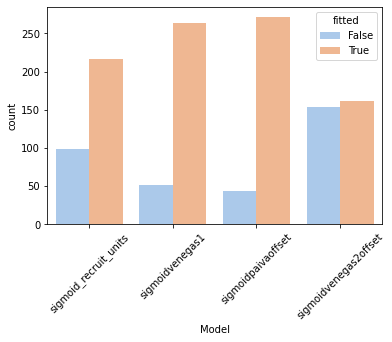

In [14]:
ax = sns.countplot(x="Model", hue="fitted", palette="pastel",
                   data=resultdf_indiv)
for item in ax.get_xticklabels():
    item.set_rotation(45)

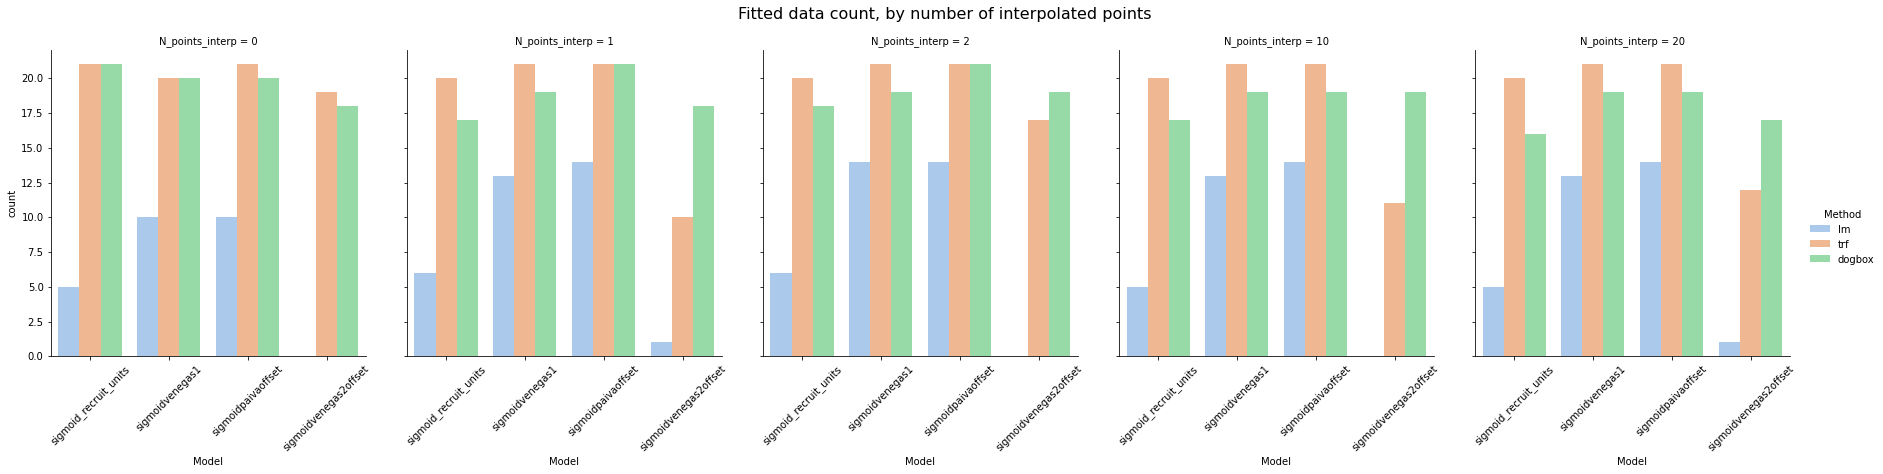

In [15]:
ax2 = sns.catplot(x="Model", kind="count", hue='Method',
            palette="pastel", col="N_points_interp",
            data=resultdf_indiv_fitted)
ax2.set_xticklabels(rotation=45)
plt.suptitle('Fitted data count, by number of interpolated points', fontsize=16, y=1.05)
plt.show()

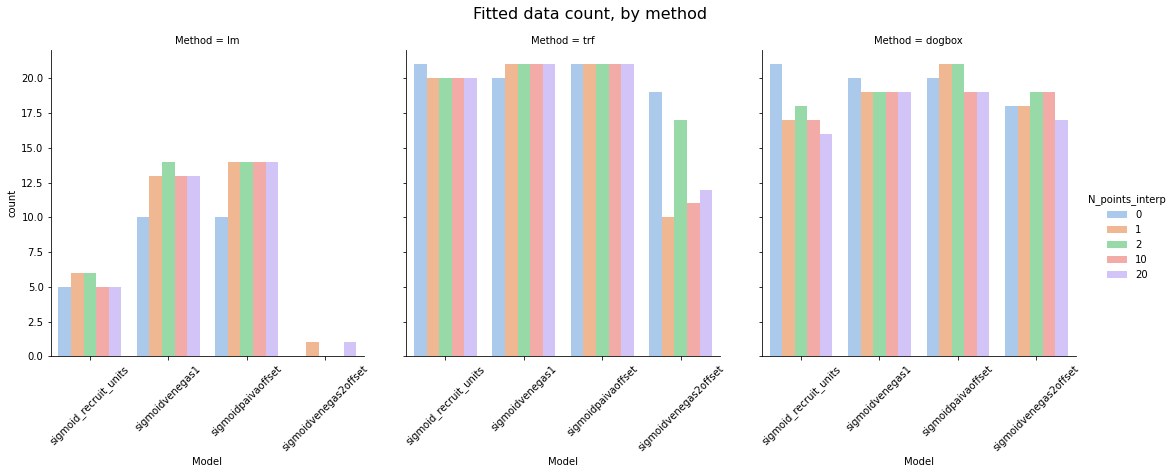

In [16]:
ax2 = sns.catplot(x="Model", kind="count", hue='N_points_interp',
            palette="pastel", col="Method",
            data=resultdf_indiv_fitted)
ax2.set_xticklabels(rotation=45)
plt.suptitle('Fitted data count, by method', fontsize=16, y=1.05)
plt.show()
# somando as 3 manobras

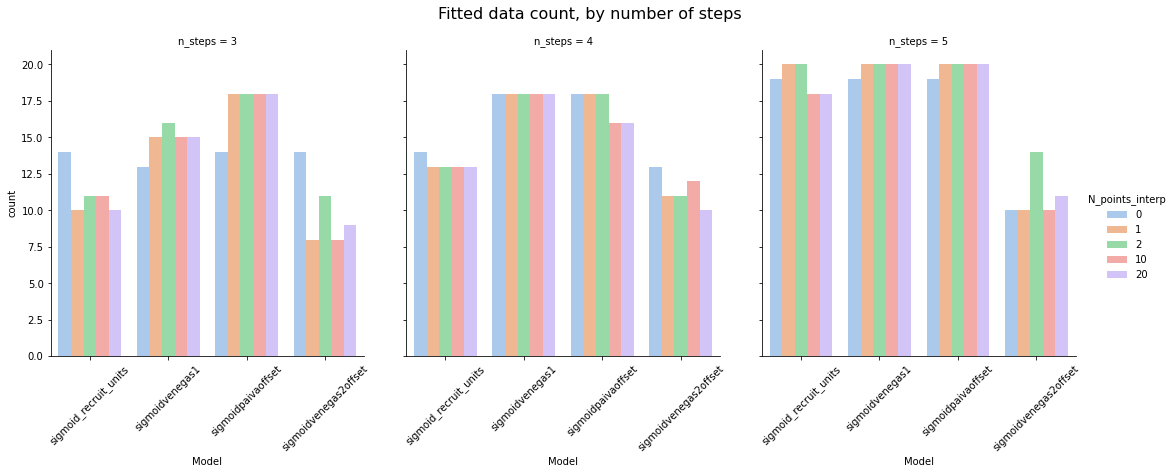

In [17]:
ax2 = sns.catplot(x="Model", kind="count", hue='N_points_interp',
            palette="pastel", col="n_steps",
            data=resultdf_indiv_fitted)
ax2.set_xticklabels(rotation=45)
plt.suptitle('Fitted data count, by number of steps', fontsize=16, y=1.05)
plt.show()
# somando os 3 métodos

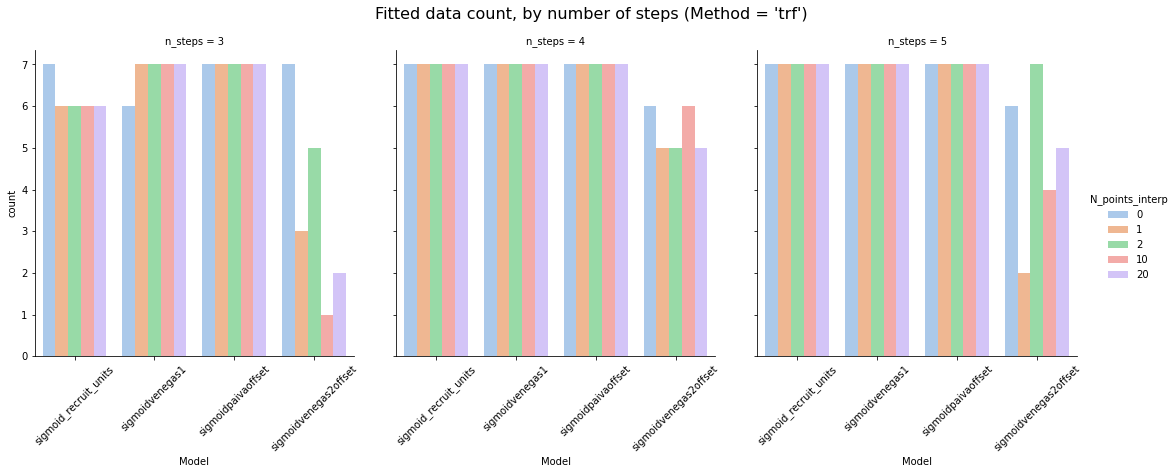

In [18]:
ax2 = sns.catplot(x="Model", kind="count", hue='N_points_interp',
            palette="pastel", col="n_steps",
            data=resultdf_indiv_fitted_trf)
ax2.set_xticklabels(rotation=45)
plt.suptitle('Fitted data count, by number of steps (Method = \'trf\')', fontsize=16, y=1.05)
plt.show()

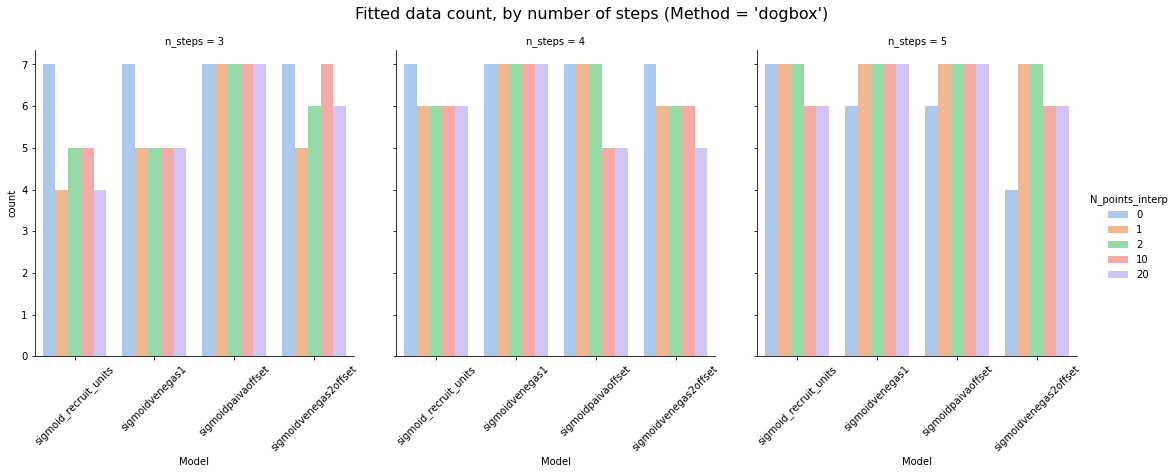

In [19]:
ax2 = sns.catplot(x="Model", kind="count", hue='N_points_interp',
            palette="pastel", col="n_steps",
            data=resultdf_indiv_fitted_dogbox)
ax2.set_xticklabels(rotation=45)
plt.suptitle('Fitted data count, by number of steps (Method = \'dogbox\')', fontsize=16, y=1.05)
plt.show()

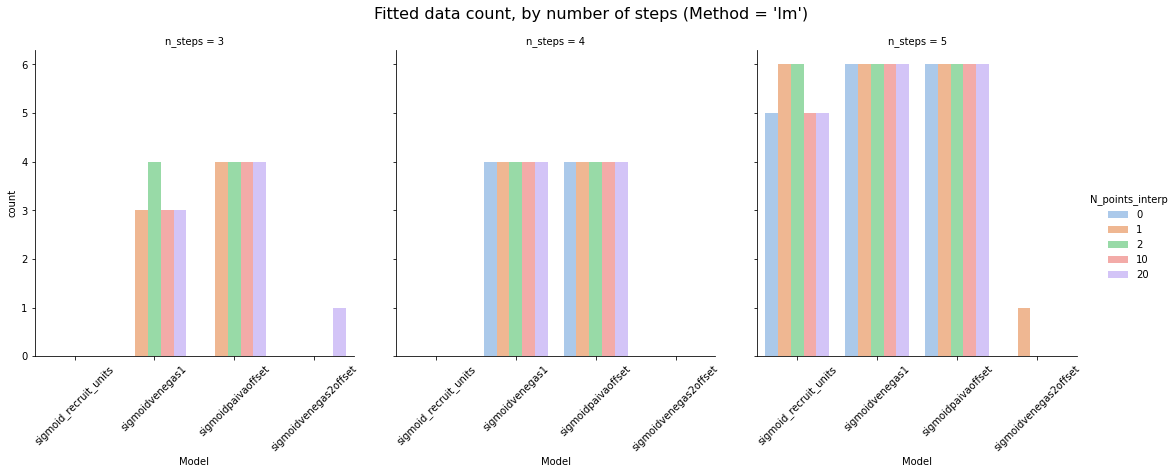

In [20]:
ax2 = sns.catplot(x="Model", kind="count", hue='N_points_interp',
            palette="pastel", col="n_steps",
            data=resultdf_indiv_fitted_lm)
ax2.set_xticklabels(rotation=45)
plt.suptitle('Fitted data count, by number of steps (Method = \'lm\')', fontsize=16, y=1.05)
plt.show()

### Erros

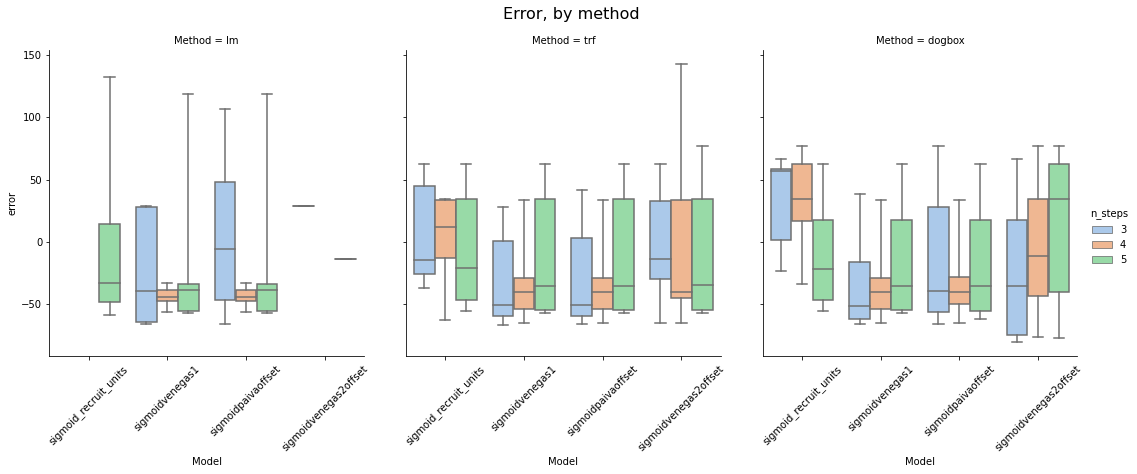

In [21]:
ax2 = sns.catplot(x="Model", y="error", kind="box", 
                  whis = 10, col='Method', hue='n_steps', palette="pastel",
                  data=resultdf_indiv_fitted)
ax2.set_xticklabels(rotation=45)
plt.suptitle('Error, by method', fontsize=16, y=1.05)
plt.show()

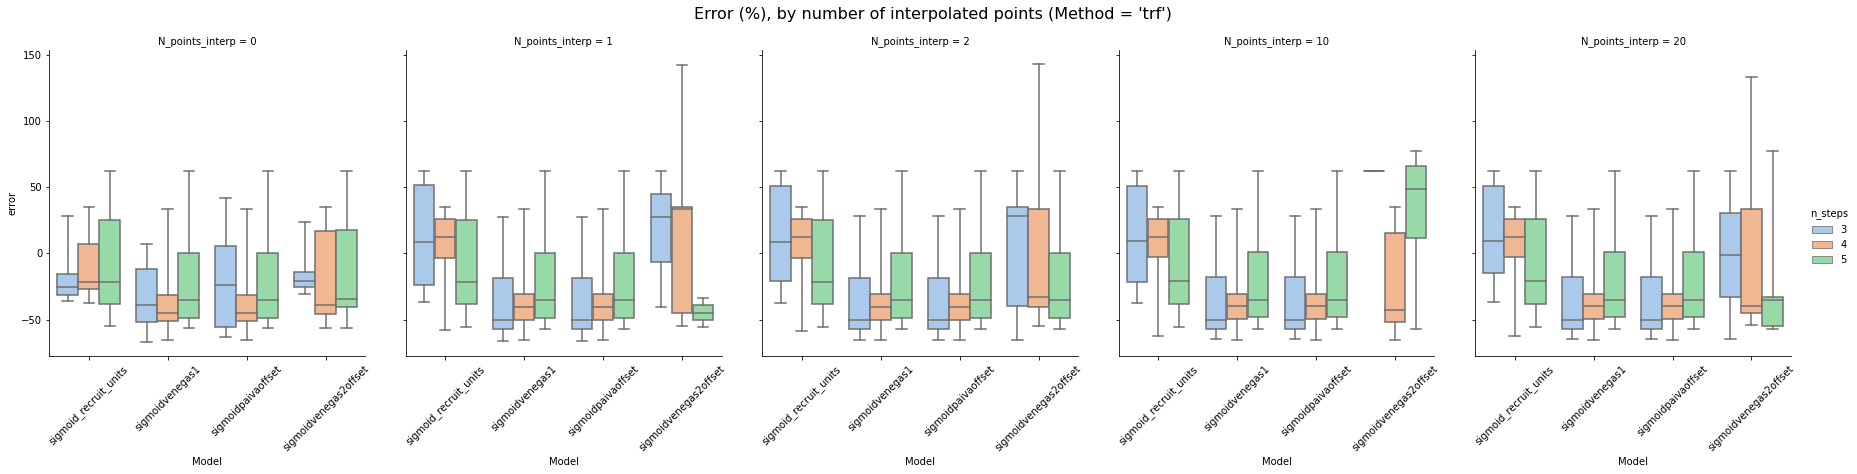

In [22]:
ax2 = sns.catplot(x="Model", y="error", kind="box", 
                  whis = 10, col='N_points_interp', hue='n_steps', palette="pastel",
                  data=resultdf_indiv_fitted_trf)
ax2.set_xticklabels(rotation=45)
plt.suptitle('Error (%), by number of interpolated points (Method = \'trf\')', fontsize=16, y=1.05)
plt.show()

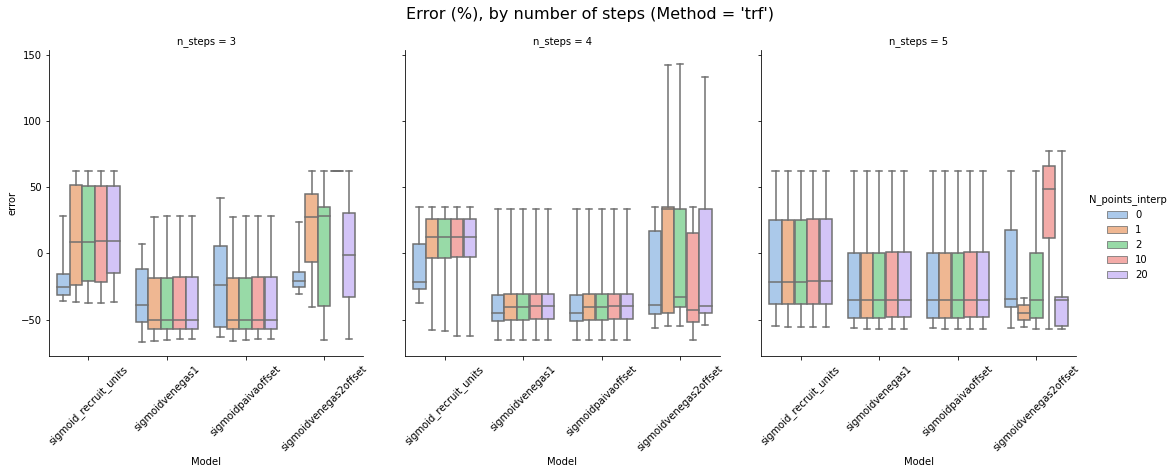

In [23]:
ax2 = sns.catplot(x="Model", y="error", kind="box", 
                  whis = 10, col='n_steps', hue='N_points_interp', palette="pastel",
                  data=resultdf_indiv_fitted_trf)
ax2.set_xticklabels(rotation=45)
plt.suptitle('Error (%), by number of steps (Method = \'trf\')', fontsize=16, y=1.05)
plt.show()

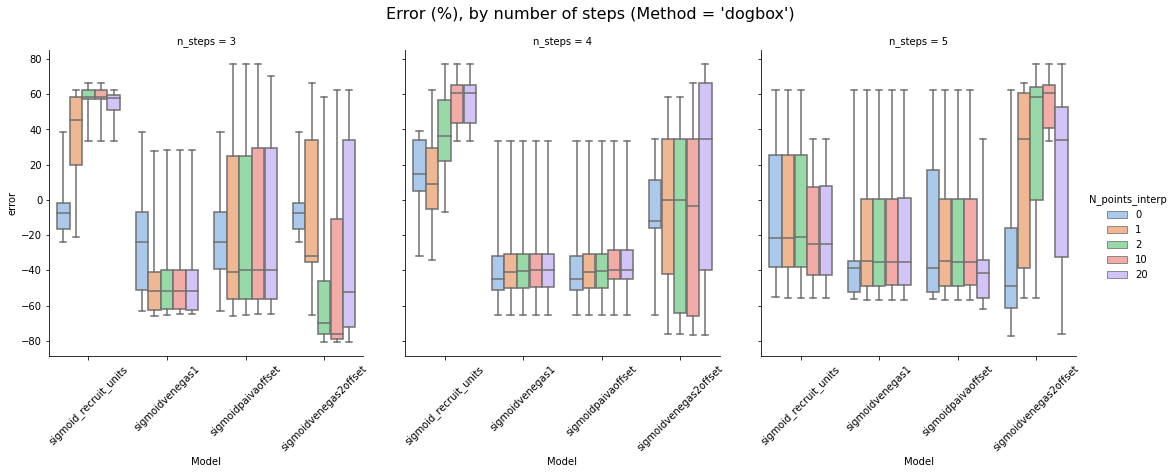

In [24]:
ax2 = sns.catplot(x="Model", y="error", kind="box", 
                  whis = 10, col='n_steps', hue='N_points_interp', palette="pastel",
                  data=resultdf_indiv_fitted_dogbox)
ax2.set_xticklabels(rotation=45)
plt.suptitle('Error (%), by number of steps (Method = \'dogbox\')', fontsize=16, y=1.05)
plt.show()

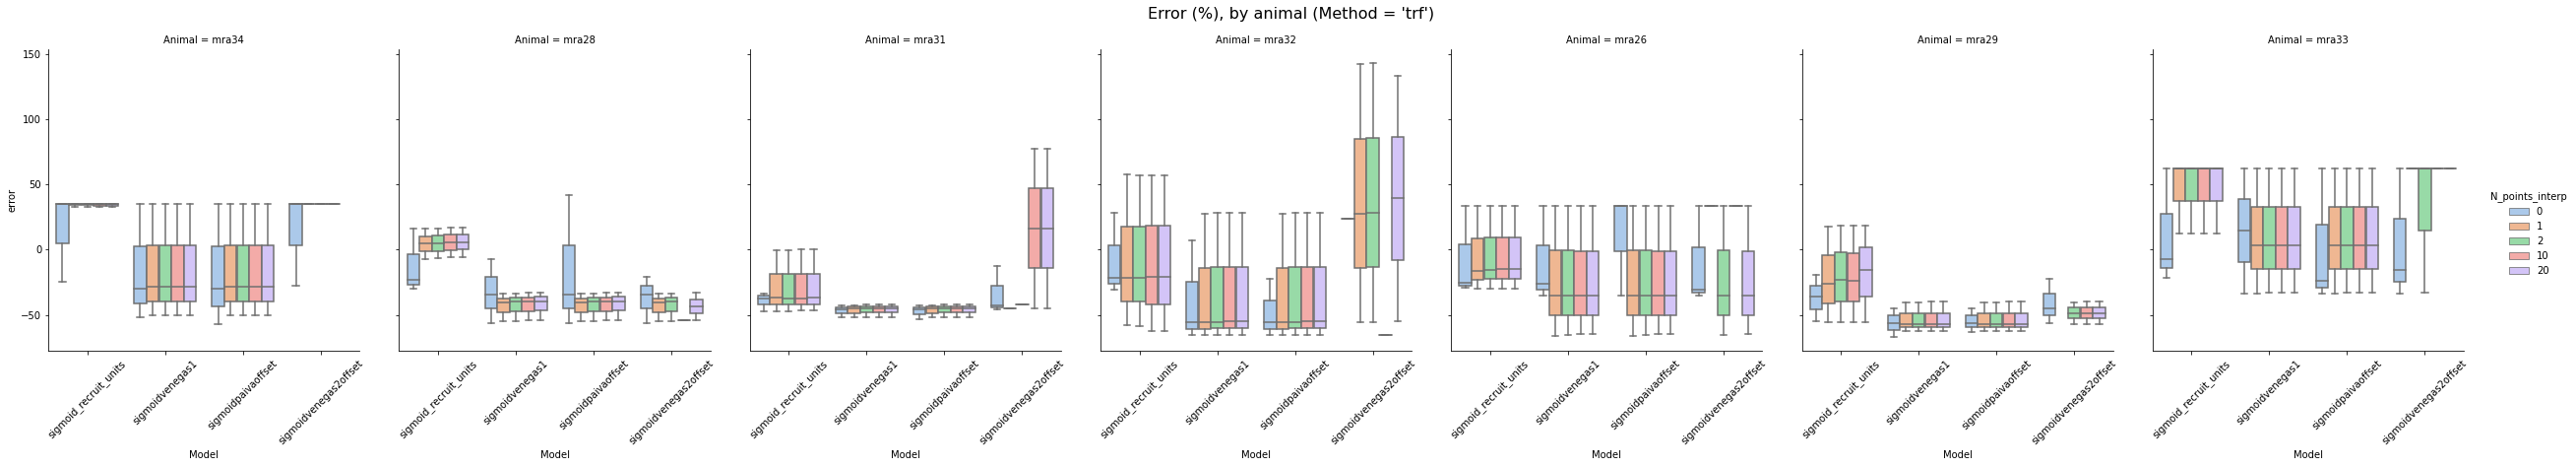

In [28]:
ax2 = sns.catplot(x="Model", y="error", kind="box", 
                  whis = 10, col='Animal', hue='N_points_interp', palette="pastel",
                  data=resultdf_indiv_fitted_trf)
ax2.set_xticklabels(rotation=45)
plt.suptitle('Error (%), by animal (Method = \'trf\')', fontsize=16, y=1.05)
plt.show()

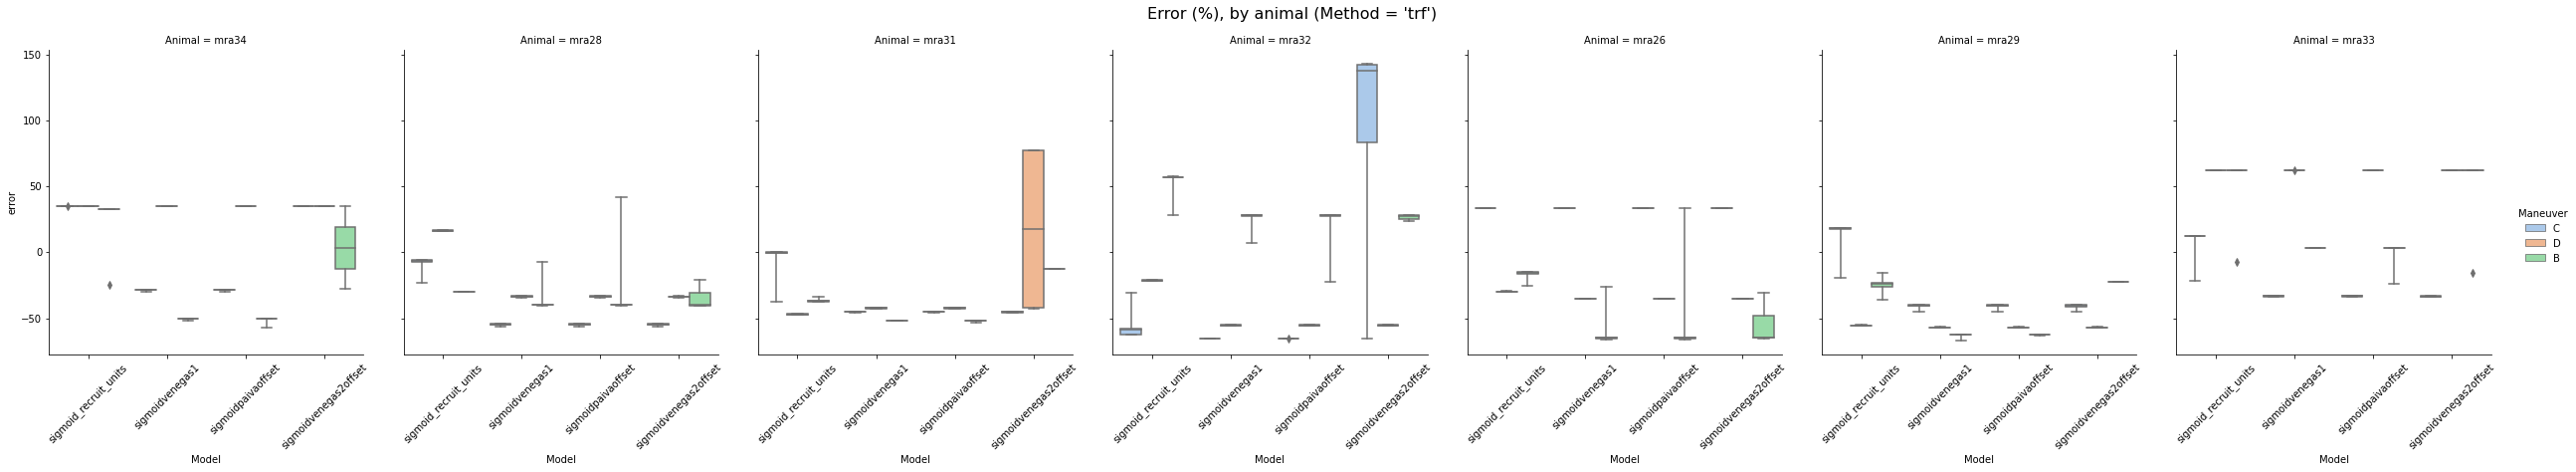

In [30]:
ax2 = sns.catplot(x="Model", y="error", kind="box", 
                  whis = 1000, col='Animal', hue='Maneuver', palette="pastel",
                  data=resultdf_indiv_fitted_trf)
ax2.set_xticklabels(rotation=45)
plt.suptitle('Error (%), by animal (Method = \'trf\')', fontsize=16, y=1.05)
plt.show()